In [ ]:
pip install inference-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.7 MB/s eta 0:00:00


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
pip install keras-ocr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 785.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.9 MB/s eta 0:00:00


{'time': 0.03842369899996356, 'image': {'width': 720, 'height': 1280}, 'predictions': [{'x': 396.875, 'y': 1056.875, 'width': 201.25, 'height': 148.75, 'confidence': 0.8628398776054382, 'class': 'License_Plate', 'class_id': 0, 'detection_id': '8872b4e8-2c7f-4a90-a884-2aa49374c224'}]}


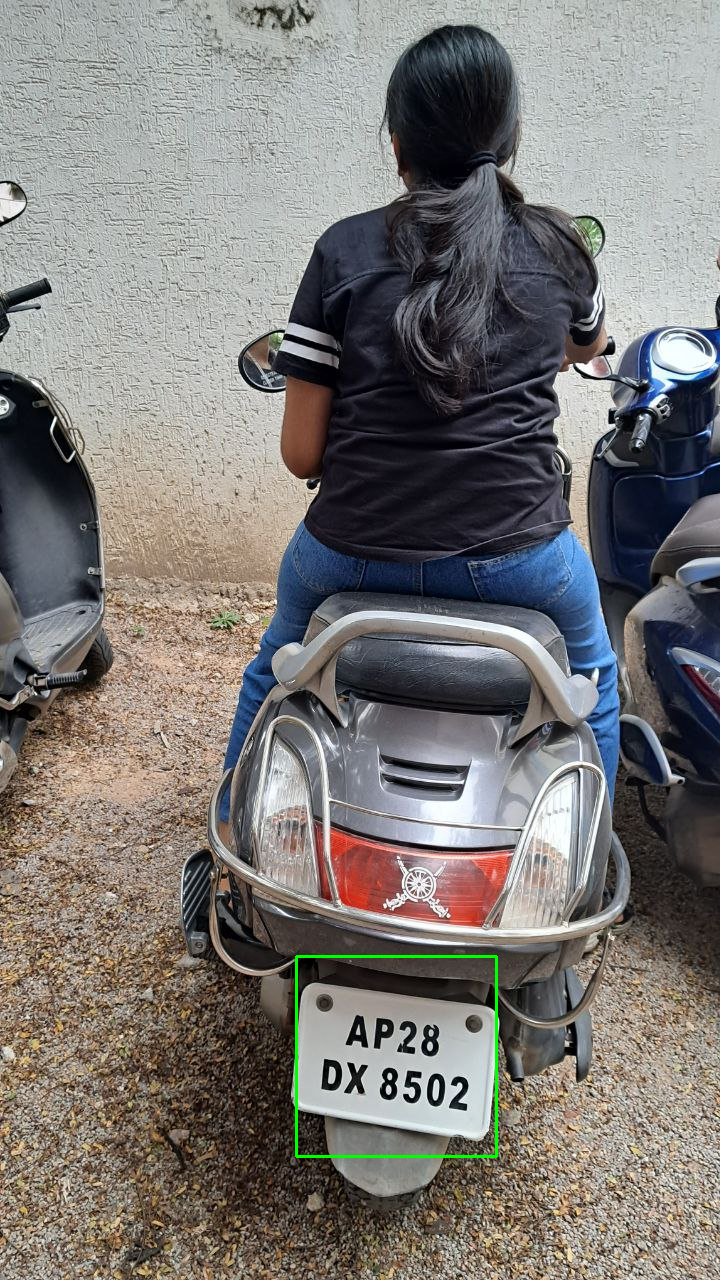

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step
Character: ap28
Character: dx
Character: 8502


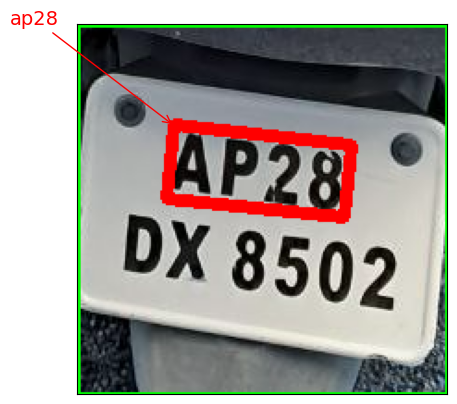

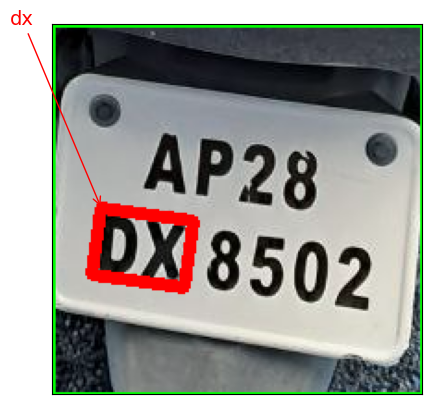

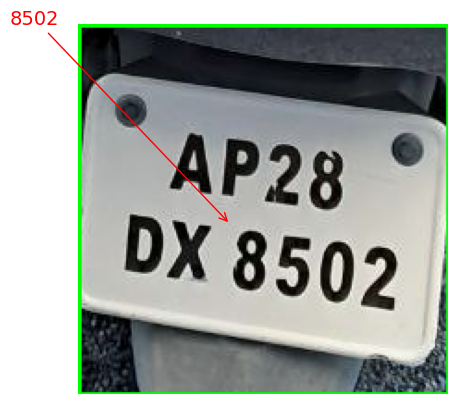

ap28dx8502


In [ ]:
from inference_sdk import InferenceHTTPClient
from google.colab.patches import cv2_imshow
import cv2
from PIL import Image
import platform  # Import the platform module
import matplotlib.pyplot as plt
import keras_ocr

# Initialize the client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="FjebqrmWpFtuakWjQmwC"
)

# Perform inference
result = CLIENT.infer('/content/photo_2023-12-04_18-45-11 (2).jpg', model_id="vehicle-registration-plates-trudk/2")



# Check if the result contains predictions
if 'predictions' in result:
    # Process the predictions
    predictions = result['predictions']

    # Load the image
    image_path = '/content/photo_2023-12-04_18-45-11 (2).jpg'
    image = cv2.imread(image_path)
    #xxmax,xxmin,yymax, yymin=0, 0, 0, 0
    # Draw bounding boxes on the image
    print(result)
    cropped_img = image
    for prediction in predictions:
      class_name = prediction.get('class')
      confidence = prediction.get('confidence')
      x, y, width, height = prediction.get('x'), prediction.get('y'), prediction.get('width'), prediction.get('height')

      # Convert coordinates to integers
      x, y, width, height = int(x), int(y), int(width), int(height)
      xmax, ymax = int(x + width), int(y + height)
      xmin, xmax, ymin, ymax = x - (width//2), x + (width//2), y - (width//2), y + (width//2)
      # Draw bounding box
      cropped_img = image[ymin:ymax, xmin:xmax]
      #xxmax
      cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
      #cv2.putText(image, f'{class_name} {confidence:.2f}', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 300, 0), 2)
  # Show the image with bounding boxes
    cv2_imshow(image)
    #cv2_imshow(cropped_img)
    pipeline = keras_ocr.pipeline.Pipeline()

    # Path to your image file
    #image_path = '<path_to_image_file>'

    # Read the image
    images = [keras_ocr.tools.read(cropped_img)]

    # Perform OCR on the image
    prediction_groups = pipeline.recognize(images)

    # Extract characters from the predictions
    license_plate = ""
    for image, predictions in zip(images, prediction_groups):
        for text, box in predictions:
            # Extracted character
            character = text
            # Bounding box coordinates
            x_min, y_min, x_max, y_max = box
            # Optionally, you can draw bounding boxes on the image
            keras_ocr.tools.drawAnnotations(image=image, predictions=[(text, box)])
            # Print the extracted character
            print("Character:", character)
            license_plate += character

    # Show the image with bounding boxes (optional)
    plt.imshow(images[0])
    plt.axis('off')
    plt.show()
    print(license_plate)

else:
    # Handle the case where there are no predictions
    print("No predictions found.")


{'time': 0.024839863999886802, 'image': {'width': 80, 'height': 80}, 'predictions': [{'x': 38.5, 'y': 37.5, 'width': 73.0, 'height': 41.0, 'confidence': 0.5711492300033569, 'class': 'License_Plate', 'class_id': 0, 'detection_id': 'fd85aed1-c854-4a55-b993-c529284e19eb'}]}


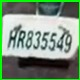

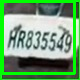

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step
Character: hre3sa0


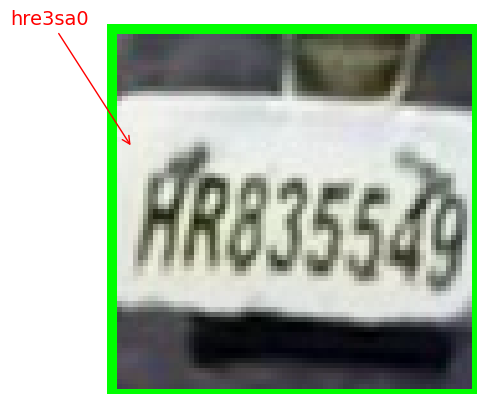

hre3sa0


In [ ]:
from inference_sdk import InferenceHTTPClient
from google.colab.patches import cv2_imshow
import cv2
from PIL import Image
import platform  # Import the platform module
import matplotlib.pyplot as plt
import keras_ocr

# Initialize the client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="FjebqrmWpFtuakWjQmwC"
)

# Perform inference
result = CLIENT.infer('/content/Numberplate.jpg', model_id="vehicle-registration-plates-trudk/2")



# Check if the result contains predictions
if len(result['predictions']) > 0:
    # Process the predictions
    predictions = result['predictions']

    # Load the image
    image_path = '/content/Numberplate.jpg'
    image = cv2.imread(image_path)
    #xxmax,xxmin,yymax, yymin=0, 0, 0, 0
    # Draw bounding boxes on the image
    print(result)
    cropped_img = image

    for prediction in predictions:
      class_name = prediction.get('class')
      confidence = prediction.get('confidence')
      x, y, width, height = prediction.get('x'), prediction.get('y'), prediction.get('width'), prediction.get('height')

      # Convert coordinates to integers
      x, y, width, height = int(x), int(y), int(width), int(height)
      xmax, ymax = int(x + width), int(y + height)
      xmin, xmax, ymin, ymax = x - (width//2), x + (width//2), y - (width//2), y + (width//2)
      # Draw bounding box
      cropped_img = image[ymin:ymax, xmin:xmax]
      #xxmax
      cv2_imshow(image)
      cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
      #cv2.putText(image, f'{class_name} {confidence:.2f}', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 300, 0), 2)
  # Show the image with bounding boxes
    cv2_imshow(image)
    #cv2_imshow(cropped_img)
    pipeline = keras_ocr.pipeline.Pipeline()

    # Path to your image file
    #image_path = '<path_to_image_file>'

    # Read the image
    images = [keras_ocr.tools.read(cropped_img)]

    # Perform OCR on the image
    prediction_groups = pipeline.recognize(images)

    # Extract characters from the predictions
    license_plate = ""
    for image, predictions in zip(images, prediction_groups):
        for text, box in predictions:
            # Extracted character
            character = text
            # Bounding box coordinates
            x_min, y_min, x_max, y_max = box
            # Optionally, you can draw bounding boxes on the image
            keras_ocr.tools.drawAnnotations(image=image, predictions=[(text, box)])
            # Print the extracted character
            print("Character:", character)
            license_plate += character

    # Show the image with bounding boxes (optional)
    plt.imshow(images[0])
    plt.axis('off')
    plt.show()
    print(license_plate)

else:
    # Handle the case where there are no predictions
    print("No predictions found.")
